In [6]:
!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/42/92/12efc318ccb5be11813ee5ec465650667935ae543d8a498eb7ac52a9c847/tensorflow-2.17.0-cp39-cp39-macosx_12_0_arm64.whl.metadata
  Using cached tensorflow-2.17.0-cp39-cp39-macosx_12_0_arm64.whl.metadata (4.1 kB)
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/66/82/564168a349148298aca281e342551404ef5521f33fba17b388ead0a84dc5/opencv_python-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl.metadata
  Using cached opencv_python-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl.metadata (20 kB)
  Obtaining dependency information for mediapipe from https://files.pythonhosted.org/packages/fb/ba/f3bb670fc7c098da7c258bd6bd3e63587583778b0a10017f354718389d1a/mediapipe-0.10.15-cp39-cp39-macosx_11_0_universal2.whl.metadata
  Using cached mediapipe-0.10.15-cp39-cp39-macosx_11_0_universal2.whl.metadata (9.7 kB)
  Obtaining dependency information for scikit-learn from https://

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp


/Users/sakshisuryawanshi/PycharmProjects/pythonProject/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
mp_face_mesh = mp.solutions.face_mesh
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results    

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 


In [7]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame")
            break

        image, results = mediapipe_detection(frame, holistic)
        
        draw_styled_landmarks(image, results)
        
        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1725295990.060709 16238171 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M1
W0000 00:00:1725295990.147070 16431989 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1725295990.163032 16431988 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1725295990.165919 16431987 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1725295990.165980 16431988 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1725295990.165983 16431994 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling su

In [44]:
len(results.right_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [45]:
mp_holistic.FACEMESH_CONTOURS

frozenset({(0, 267),
           (7, 163),
           (10, 338),
           (13, 312),
           (14, 317),
           (17, 314),
           (21, 54),
           (33, 7),
           (33, 246),
           (37, 0),
           (39, 37),
           (40, 39),
           (46, 53),
           (52, 65),
           (53, 52),
           (54, 103),
           (58, 132),
           (61, 146),
           (61, 185),
           (63, 105),
           (65, 55),
           (66, 107),
           (67, 109),
           (70, 63),
           (78, 95),
           (78, 191),
           (80, 81),
           (81, 82),
           (82, 13),
           (84, 17),
           (87, 14),
           (88, 178),
           (91, 181),
           (93, 234),
           (95, 88),
           (103, 67),
           (105, 66),
           (109, 10),
           (127, 162),
           (132, 93),
           (136, 172),
           (144, 145),
           (145, 153),
           (146, 91),
           (148, 176),
           (149, 150),
   

In [46]:
draw_landmarks(frame, results)

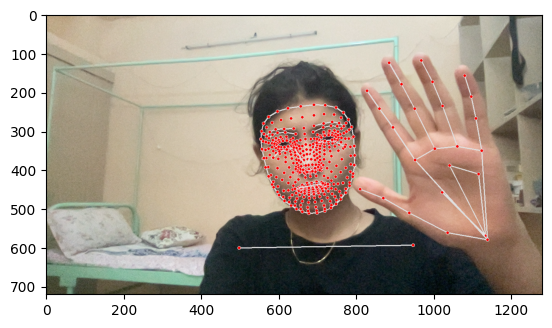

In [47]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [48]:
results.left_hand_landmarks

landmark {
  x: 0.890113115
  y: 0.806589901
  z: 3.60750391e-07
}
landmark {
  x: 0.810119152
  y: 0.781855106
  z: -0.0184383728
}
landmark {
  x: 0.73237443
  y: 0.711042285
  z: -0.0283849295
}
landmark {
  x: 0.679834604
  y: 0.657634735
  z: -0.0385406353
}
landmark {
  x: 0.633272231
  y: 0.625008583
  z: -0.0493734702
}
landmark {
  x: 0.744052112
  y: 0.520911694
  z: -0.011825989
}
landmark {
  x: 0.699417531
  y: 0.404680938
  z: -0.0315809324
}
landmark {
  x: 0.671918571
  y: 0.33758536
  z: -0.0495506041
}
landmark {
  x: 0.647571802
  y: 0.274909794
  z: -0.0640440062
}
landmark {
  x: 0.783902109
  y: 0.480766892
  z: -0.022159962
}
landmark {
  x: 0.743163943
  y: 0.338040054
  z: -0.0399462283
}
landmark {
  x: 0.717072904
  y: 0.250850141
  z: -0.0585803352
}
landmark {
  x: 0.691505432
  y: 0.174204946
  z: -0.0732844546
}
landmark {
  x: 0.829130173
  y: 0.472508729
  z: -0.0364419371
}
landmark {
  x: 0.799583554
  y: 0.328799784
  z: -0.0577148423
}
landmark {
  

In [49]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [50]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [51]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [52]:
extract_keypoints(results).shape

(1662,)

In [53]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou','no','bye','happy','sad'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [54]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [ ]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()